패키지 참조 -> 데이터 셋 준비 -> 데이터 전처리 -> 탐색적 데이터 분석 -> 데이터 셋 분할 -> 모델 개발 -> 학습 결과 평가 -> 학습 결과 적용

![res/code.png](res/code.png)

# XOR 게이트

## 1) 패키지 참조하기

In [23]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential  # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop # 옵티마이저
from tensorflow.keras.losses import mse         # 활성화 함수
from pandas import DataFrame

## 2) 데이터 셋 준비하기

### 랜덤 시드값 고정

In [24]:
np.random.seed(777)

### 데이터 셋 구성

`XOR` 회로는 입력값이 동일한 경우 `False`, 입력값이 서로 다른 경우 `True`

In [25]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [1], [1], [0]])

## 3) 데이터 전처리

> 데이터 양이 적으므로 제외.

## 4) 탐색적 데이터 분석

In [26]:
label = train_y.flatten()
df = DataFrame(train_x, label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
0,1,1


#### 5) 데이터 셋 분할

> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 제외.

## 6) 모델 개발

### 모델 정의

XOR은 학습층을 2개 사용해야 분석이 가능.

- input_shape은 독립변수 수
- Dense 신경망 개수의 수에 따라서 모델의 성능에 차이가 발생
    - 직감으로 맞춤(다른 방법 없음) 보통 16 또는 32 이상
    - 최적의 값을 직접 탐색(너무 많으면 컴퓨터 다운)
- activation은 모델과 분석 종류에 따라서 다름 
    - 보통 시작은 relu, 분류는 sigmoid, 회귀는 linear
- optimizer은 모르면 Adam
- epochs는 많아도 크게 상관이 없음
- 2차항을 하고 싶다면 sklearn으로 2차항 생성 후 Sequential에 입력

In [27]:
model = Sequential()
# 층(Dense)이 1, 2인 경우 정확도 50%
# 층(Dense)이 8인 경우 정확도 75%
# 층(Dense)이 16, 32인 경우 정확도 100%
model.add(Dense(16, input_shape = (2, ), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = RMSprop(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                48        
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습 및 DF화

epochs 여러 번 돌리면 중첩 효과가 발생

In [28]:
hist = model.fit(train_x, train_y, epochs=500)

Epoch 1/500


1/1 [==============================] - 1s 557ms/step - loss: 0.2505 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2498 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2492 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2488 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2485 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2481 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2478 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2476 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2473 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2471 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2468 - acc: 0.

In [29]:
# 학습 결과(epochs 횟수 별 솔실률, 정확도)
result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,acc
epochs,,
1,0.250459,0.75
2,0.249770,0.75
3,0.249238,0.50
4,0.248819,0.50
5,0.248460,0.50
...,...,...
496,0.167863,1.00
497,0.167662,1.00
498,0.167485,1.00


## 7) 학습 결과 평가

### 학습 결과 시각화

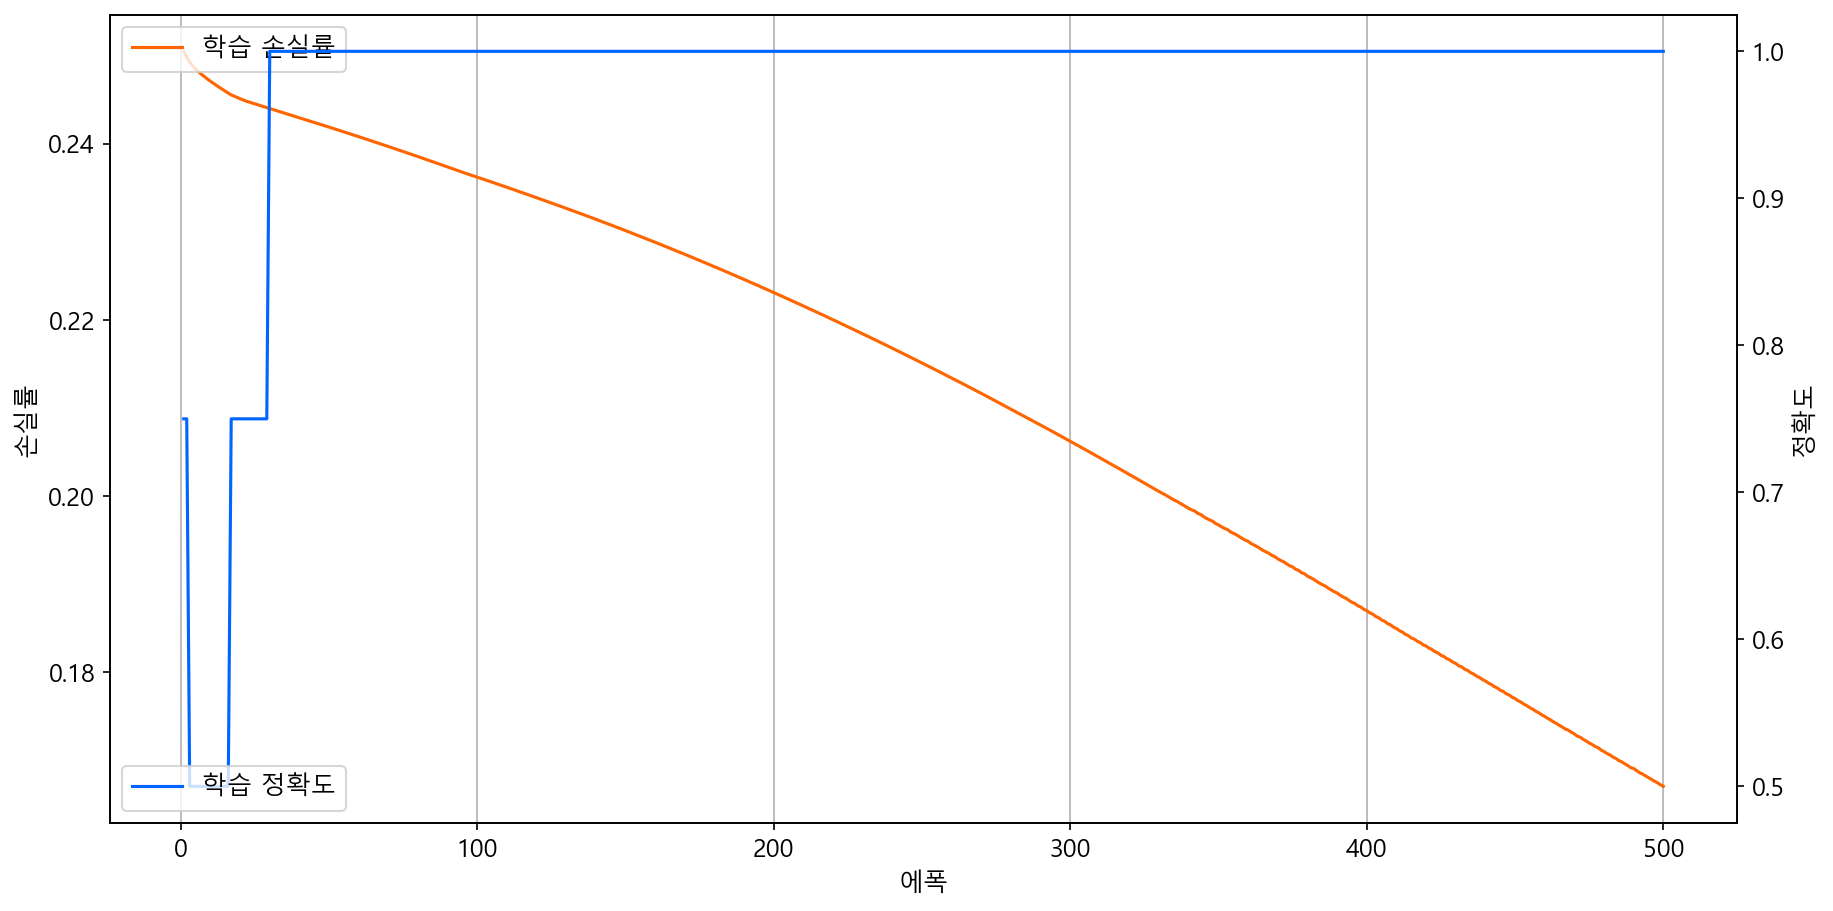

In [30]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(x=result_df.index, y='loss', data=result_df, color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(x=result_df.index, y='acc', data=result_df, color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

### 모델 성능 평가

In [31]:
ev = model.evaluate(train_x, train_y)
# ev

print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))
# print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0]*100, ev[1]*100))

1/1 [==============================] - 0s 162ms/step - loss: 0.1669 - acc: 1.0000
손실률: 0.17, 정확도: 1.00


### 가중치, 편향 확인

출력하기 애매함(값이 너무 많음) -> 형태만 분석

In [32]:
weights = model.get_weights()
weights

[array([[-0.03684229, -0.4681411 ,  0.48874655, -0.7006118 ,  0.02875757,
          0.546771  , -0.5217164 ,  0.37530687, -0.11925396,  0.40498546,
          0.22593395, -0.3698609 , -0.44336158, -0.36954743,  0.24134862,
         -0.444937  ],
        [-0.33797306, -0.2457664 ,  0.4883223 ,  0.70003045, -0.4683378 ,
         -0.52381986, -0.44276512,  0.20663986,  0.48863134,  0.40607223,
          0.32600495, -0.11317185,  0.09789976, -0.4360022 ,  0.4990103 ,
         -0.38315606]], dtype=float32),
 array([ 0.0000000e+00,  0.0000000e+00, -4.8610726e-01, -5.8032945e-04,
        -2.9405775e-02, -2.2376236e-03,  0.0000000e+00,  2.3610836e-03,
         1.5238835e-01, -4.0284914e-01,  2.1854260e-03,  0.0000000e+00,
        -9.8235995e-02,  0.0000000e+00,  4.4122612e-04,  0.0000000e+00],
       dtype=float32),
 array([[ 0.4936093 ],
        [-0.01942462],
        [-0.6904349 ],
        [ 0.83836395],
        [-0.28159425],
        [ 0.62595403],
        [-0.49518183],
        [ 0.4364236 

In [33]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층과 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 16)
(16,)
(16, 1)
(1,)


In [34]:
# 본인 추가

print(weights[0].flatten(),'\n')
print(weights[1].flatten(),'\n')
print(weights[2].flatten(),'\n')
print(weights[3].flatten())

[-0.03684229 -0.4681411   0.48874655 -0.7006118   0.02875757  0.546771
 -0.5217164   0.37530687 -0.11925396  0.40498546  0.22593395 -0.3698609
 -0.44336158 -0.36954743  0.24134862 -0.444937   -0.33797306 -0.2457664
  0.4883223   0.70003045 -0.4683378  -0.52381986 -0.44276512  0.20663986
  0.48863134  0.40607223  0.32600495 -0.11317185  0.09789976 -0.4360022
  0.4990103  -0.38315606] 

[ 0.0000000e+00  0.0000000e+00 -4.8610726e-01 -5.8032945e-04
 -2.9405775e-02 -2.2376236e-03  0.0000000e+00  2.3610836e-03
  1.5238835e-01 -4.0284914e-01  2.1854260e-03  0.0000000e+00
 -9.8235995e-02  0.0000000e+00  4.4122612e-04  0.0000000e+00] 

[ 0.4936093  -0.01942462 -0.6904349   0.83836395 -0.28159425  0.62595403
 -0.49518183  0.4364236  -0.45382604 -0.5701058   0.48602796 -0.3526368
 -0.10540552  0.23243397  0.23732683 -0.43208408] 

[-0.28971234]


## 8) 학습 결과 적용

In [35]:
r = model.predict(train_x)
df['예측값'] = r.reshape(-1).round()
df

1/1 [==============================] - 0s 161ms/step


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
0,1,1,0.0
